# **building an automatic reporting system that recognizes the boat**

In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalAveragePooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.metrics import Precision
from keras.metrics import Recall
from keras.metrics import categorical_crossentropy
from keras import layers


**Splitting the dataset into train and test in the ratio 80:20**

In [2]:
import splitfolders
from os import listdir   

input_folder = r"C:\Users\henis\OneDrive\Pictures\Screenshots\OneDrive\Desktop\AL_ML_Classnotes\Deep Learning\Project\input"
output = r"C:\Users\henis\OneDrive\Pictures\Screenshots\OneDrive\Desktop\AL_ML_Classnotes\Deep Learning\Project\train_val_data"

splitfolders.ratio(input_folder,output=output,seed= 42, ratio=(.8,.2))


Copying files: 1162 files [00:02, 452.69 files/s]


**Initializing the train generator and test generator Using Keras ImageDataGenerator**

**Both generators are initialized with data normalization** 


In [3]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2,zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)


**Loading train and validation in batches of 32 using the generators initialized**

In [4]:

train_set = train_datagen.flow_from_directory(
    r"C:\Users\henis\OneDrive\Pictures\Screenshots\OneDrive\Desktop\AL_ML_Classnotes\Deep Learning\Project\train_val_data\train",
                                              target_size=(64,64),
                                              batch_size= 32,
                                              shuffle=True , 
                                              class_mode='categorical')

test_set = test_datagen.flow_from_directory(r"C:\Users\henis\OneDrive\Pictures\Screenshots\OneDrive\Desktop\AL_ML_Classnotes\Deep Learning\Project\train_val_data\val",
                                              target_size=(64,64),
                                              batch_size= 32,
                                              shuffle=True, 
                                              class_mode='categorical')

Found 925 images belonging to 9 classes.
Found 237 images belonging to 9 classes.


**Loading the test dataset in batches of 32 using the generators initialized**

In [5]:
test_inputs = ImageDataGenerator(rescale=1./255)
test_img_set = test_inputs.flow_from_directory(r"C:\Users\henis\OneDrive\Pictures\Screenshots\OneDrive\Desktop\AL_ML_Classnotes\Deep Learning\Project\testdata_boat",
                                              target_size=(64,64),
                                              batch_size= 32,
                                              shuffle=True, 
                                              class_mode='categorical')

Found 8 images belonging to 1 classes.


### **1. Building a CNN network using Keras**

In [6]:
classifier = Sequential()
classifier.add(Convolution2D(32,3,3,input_shape=(64,64,3), activation="relu"))
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [7]:
classifier.add(Convolution2D(32,3,3, activation="relu"))
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [8]:
classifier.add(GlobalAveragePooling2D())

In [9]:
classifier.add(Flatten())

In [10]:
classifier.add(Dense(units=128, activation="relu"))
classifier.add(Dense(units=128, activation="relu"))
classifier.add(Dense(units=9, activation="softmax"))

**Compiling the model**

In [11]:
classifier.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy',Precision(),Recall()])

**Training the model for 20 epochs**

In [12]:
history = classifier.fit(train_set,validation_split=0.33,epochs=20,validation_data=test_set)

Epoch 1/20
29/29 [==============================] - 29s 921ms/step - loss: 1.8897 - accuracy: 0.3362 - precision: 0.6364 - recall: 0.0076 - val_loss: 1.8428 - val_accuracy: 0.3291 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
29/29 [==============================] - 23s 812ms/step - loss: 1.8102 - accuracy: 0.3362 - precision: 0.8000 - recall: 0.0086 - val_loss: 1.8110 - val_accuracy: 0.3291 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20
29/29 [==============================] - 28s 960ms/step - loss: 1.8021 - accuracy: 0.3362 - precision: 0.4545 - recall: 0.0270 - val_loss: 1.8148 - val_accuracy: 0.3291 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/20
29/29 [==============================] - 30s 1s/step - loss: 1.7823 - accuracy: 0.3362 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.8038 - val_accuracy: 0.3291 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/20
29/29 [==============================] - 29s 1s/step

**plotting training loss and accuracy against epochs**


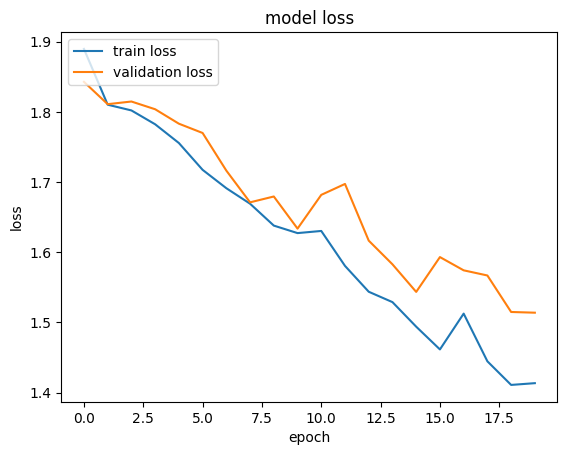

In [13]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper left')
plt.show()

**plotting testing loss and accuracy against epochs**


dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])


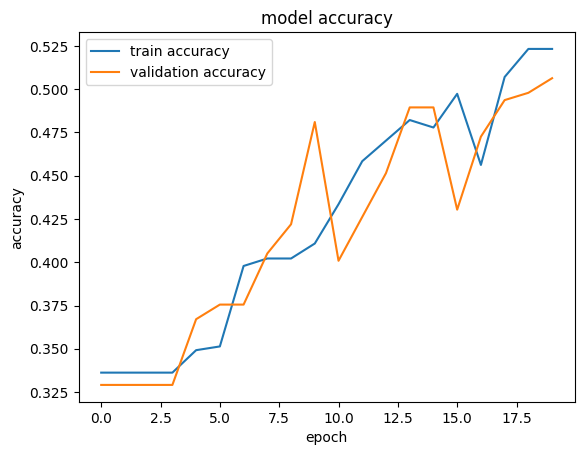

In [14]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'validation accuracy'], loc='upper left')
plt.show()

**Evaluating the model on test images**

In [15]:
import numpy as np
from keras.utils import load_img
from keras.utils import img_to_array
from os import listdir
from os.path import isfile,join

In [16]:
test_image_path = "C:/Users/henis/OneDrive/Pictures/Screenshots/OneDrive/Desktop/AL_ML_Classnotes/Deep Learning/Project/testdata_boat/"
test_images = [img for img in listdir(test_image_path) if isfile(join(test_image_path,img))]
print(test_images)
                                                                 

['29.jpg', '33.jpg', '34.jpg', '60.jpg', 'buoy.jpg', 'Ferry.jpg', 'freight.jpg', 'paper.jpg']


In [17]:
train_set.class_indices

{'buoy': 0,
 'cruise_ship': 1,
 'ferry_boat': 2,
 'freight_boat': 3,
 'gondola': 4,
 'inflatable_boat': 5,
 'kayak': 6,
 'paper_boat': 7,
 'sailboat': 8}

In [18]:
train_set.class_indices.items()


dict_items([('buoy', 0), ('cruise_ship', 1), ('ferry_boat', 2), ('freight_boat', 3), ('gondola', 4), ('inflatable_boat', 5), ('kayak', 6), ('paper_boat', 7), ('sailboat', 8)])

In [19]:
for img in test_images:
    x = load_img(test_image_path+img, target_size=(64,64))
    x = img_to_array(x)
    x = np.expand_dims(x, axis =0)
    
    # print(x.shape)
    
    
    # x = np.vstack(x)
    classes = classifier.predict(x)
    classes = np.array(classes.flatten())
    
    
    max_index = np.where(classes >= 0.5)    
    for key,val in train_set.class_indices.items():
        if max_index[0][0] == val:
            print(val,":",key)
            print("\n")

1/1 [==============================] - 0s 103ms/step
8 : sailboat


1/1 [==============================] - 0s 20ms/step
8 : sailboat


1/1 [==============================] - 0s 20ms/step
8 : sailboat


1/1 [==============================] - 0s 22ms/step
8 : sailboat


1/1 [==============================] - 0s 29ms/step
8 : sailboat


1/1 [==============================] - 0s 30ms/step
4 : gondola


1/1 [==============================] - 0s 20ms/step
8 : sailboat


1/1 [==============================] - 0s 30ms/step
8 : sailboat




**printing the test loss and accuracy**

In [20]:
score = classifier.evaluate(test_set, verbose = 1) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

8/8 [==============================] - 6s 804ms/step - loss: 1.5139 - accuracy: 0.5063 - precision: 0.6406 - recall: 0.3460
Test loss: 1.5138884782791138
Test accuracy: 0.5063291192054749


### **2. MobileNetV2 light weight model**

In [21]:
from keras.applications import MobileNetV2, DenseNet121
import tensorflow_hub as hub
from tensorflow.keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping 

**1) Using Keras ImageDataGenerator the train generator is initialized with validation_split=0.2 and test generator**
**2) Splitting the dataset into train and test datasets in the ration 70:30, with shuffle and random state=1**

In [22]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3)

In [23]:
train_generator = train_datagen.flow_from_directory(
    r'C:\Users\henis\OneDrive\Pictures\Screenshots\OneDrive\Desktop\AL_ML_Classnotes\Deep Learning\Project\Automating_Port_Operations_dataset',
    target_size= ((224, 224)),
    batch_size=32,
    shuffle=True,
    class_mode='categorical',
    subset='training')

Found 820 images belonging to 9 classes.


In [24]:
validation_generator = train_datagen.flow_from_directory(
    r'C:\Users\henis\OneDrive\Pictures\Screenshots\OneDrive\Desktop\AL_ML_Classnotes\Deep Learning\Project\Automating_Port_Operations_dataset',
    target_size= (64,64),
    batch_size=32,
    shuffle=True,
    class_mode='categorical',
    subset='validation')

Found 342 images belonging to 9 classes.


In [25]:
test_data = train_datagen.flow_from_directory(
    r'C:\Users\henis\OneDrive\Pictures\Screenshots\OneDrive\Desktop\AL_ML_Classnotes\Deep Learning\Project\testdata_boat',
    target_size= (64,64),
    batch_size=32,
    shuffle=True,
    class_mode='categorical')

Found 8 images belonging to 1 classes.


**Building a CNN network using Keras with layers**

In [26]:
mobile = MobileNetV2(input_shape=(96,96,3),include_top=False,weights='imagenet')


In [27]:
model = Sequential()
model.add(mobile)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_96 (Funct  (None, 3, 3, 1280)        2257984   
 ional)                                                          
                                                                 
Total params: 2257984 (8.61 MB)
Trainable params: 2223872 (8.48 MB)
Non-trainable params: 34112 (133.25 KB)
_________________________________________________________________


In [28]:
# model.add(Convolution2D(32,3, 3, input_shape = (64, 64, 3), activation = 'relu'))


In [29]:
model.add(GlobalAveragePooling2D())




model.add(Dense(units = 256, activation = 'relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.1))

model.add(Dense(units = 128, activation = 'relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.1))

model.add(Dense(units = 9, activation = 'softmax'))
# model.add(tf.keras.layers.Flatten())

**Compiling the model with Adam optimizer, categorical_crossentropy loss, and metrics accuracy, Precision, and Recall**

In [30]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy',Precision(),Recall()])

**Training the model for 50 epochs and Early stopping while monitoring validation loss**

In [31]:
callback = EarlyStopping(monitor='loss', patience=3)
history1 = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[callback]
)


Epoch 1/50
26/26 [==============================] - 145s 5s/step - loss: 1.5245 - accuracy: 0.5634 - precision_1: 0.7075 - recall_1: 0.4512 - val_loss: 3.1911 - val_accuracy: 0.2398 - val_precision_1: 0.3315 - val_recall_1: 0.1754
Epoch 2/50
26/26 [==============================] - 110s 4s/step - loss: 0.7640 - accuracy: 0.7659 - precision_1: 0.8343 - recall_1: 0.7000 - val_loss: 3.7715 - val_accuracy: 0.2251 - val_precision_1: 0.2953 - val_recall_1: 0.1667
Epoch 3/50
26/26 [==============================] - 108s 4s/step - loss: 0.5956 - accuracy: 0.8134 - precision_1: 0.8654 - recall_1: 0.7683 - val_loss: 3.5582 - val_accuracy: 0.2515 - val_precision_1: 0.3317 - val_recall_1: 0.1988
Epoch 4/50
26/26 [==============================] - 106s 4s/step - loss: 0.3931 - accuracy: 0.8793 - precision_1: 0.9098 - recall_1: 0.8488 - val_loss: 5.9356 - val_accuracy: 0.3012 - val_precision_1: 0.3486 - val_recall_1: 0.2895
Epoch 5/50
26/26 [==============================] - 105s 4s/step - loss: 0.3

**Evaluating the model on test images**

In [32]:
for img in test_images:
    x1 = load_img(test_image_path+img, target_size=(96,96))
    x1 = img_to_array(x1)
    x1 = np.expand_dims(x1, axis =0)
    classes1 = model.predict(x1)
    classes1 = np.array(classes1.flatten())    
    
    max_index = np.where(classes1 >= 0.5)    
    for key,val in train_set.class_indices.items():
        try:
            if max_index[0][0] == val:
                print(val,":",key)
                print("\n")
        except:
            break

1/1 [==============================] - 1s 958ms/step
6 : kayak


1/1 [==============================] - 0s 32ms/step
0 : buoy


1/1 [==============================] - 0s 32ms/step
6 : kayak


1/1 [==============================] - 0s 32ms/step
6 : kayak


1/1 [==============================] - 0s 33ms/step
0 : buoy


1/1 [==============================] - 0s 33ms/step
6 : kayak


1/1 [==============================] - 0s 36ms/step
6 : kayak


1/1 [==============================] - 0s 34ms/step
0 : buoy




**printing the test loss and accuracy**

In [33]:
score1 = model.evaluate(validation_generator, verbose = 1) 
print('Test loss:', score1[0]) 
print('Test accuracy:', score1[1])

11/11 [==============================] - 5s 423ms/step - loss: 9.1626 - accuracy: 0.3509 - precision_1: 0.3625 - recall_1: 0.3509
Test loss: 9.162562370300293
Test accuracy: 0.35087719559669495


**Evaluating the model on test images and print the test loss and accuracy**

**Plotting Train loss Vs Validation loss**

In [34]:
history1.history.keys()

dict_keys(['loss', 'accuracy', 'precision_1', 'recall_1', 'val_loss', 'val_accuracy', 'val_precision_1', 'val_recall_1'])

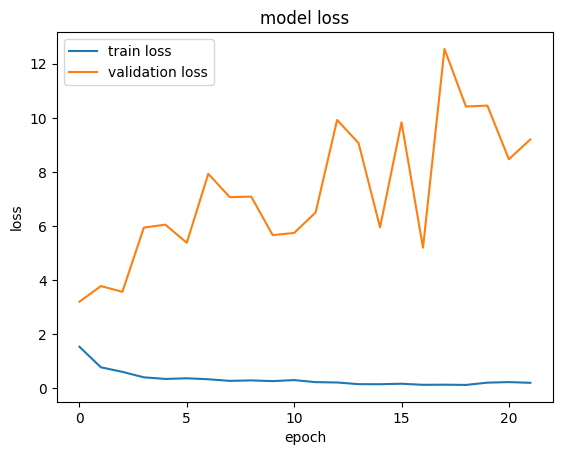

In [35]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper left')
plt.show()

**Plotting Train accuracy Vs Validation accuracy**

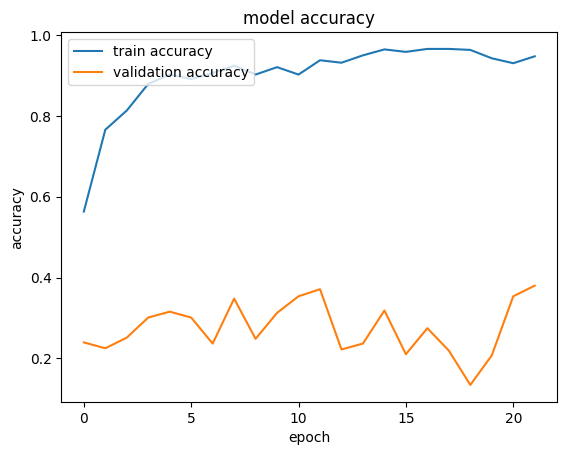

In [36]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'validation accuracy'], loc='upper left')
plt.show()

### **Conclusion**

The automatic reporting system in CNN model and MobileNetV2 lightweight model that recognizes the boat is built